# How DAS displacement drifts

In [149]:
import numpy as np
import matplotlib.pyplot as plt

In [150]:
fs = 10e3 # sampling frequency
unc = 1e-9 # DAS uncertainty
t = 120 # seconds, time that we record
n_cha = 100 # number of DAS channels

In [151]:
# random noise in your cable from measurement uncertainty
dx_all = (np.random.rand(n_cha,int(fs*t))-0.5)*2*unc #starting position

Text(0.5, 0, 'Time [s]')

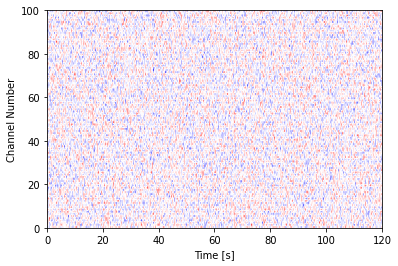

In [152]:
# plot it
plt.imshow(dx_all[:,::100], aspect='auto', vmin=-unc, vmax=unc, extent=[0,t,0,n_cha], cmap='seismic')
plt.ylabel('Channel Number')
plt.xlabel('Time [s]')

In [153]:
# calculate the displacement for each channel
displs = np.cumsum(np.cumsum(dx_all, axis=1), axis=1)

Text(0.5, 0, 'Time [s]')

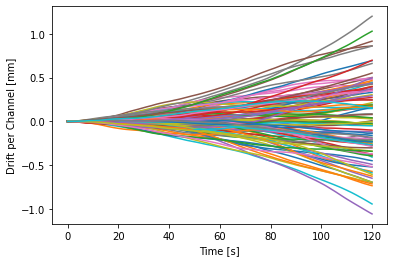

In [154]:
# plot displacement per channel over time
for i in range(n_cha):
    plt.plot(np.arange(0,t+1),displs[i,::int(fs)-1])
plt.ylabel('Drift per Channel [mm]')
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

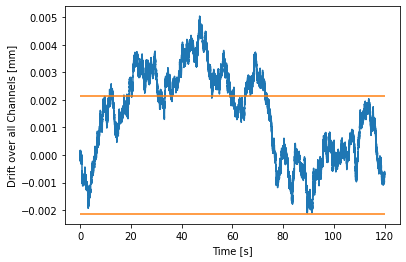

In [155]:
# plot displacement integrated over the entire cable
displ_int = np.cumsum(np.sum(dx_all, axis=0)) # displacement over the entire cable
plt.plot(np.arange(0,t,1/fs), displ_int*1e3)
displ_rms = np.sqrt(np.mean(displ_int**2))
plt.hlines(np.array([-displ_rms, displ_rms])*1e3, 0,t, color='C1')
plt.ylabel('Drift over all Channels [mm]')
plt.xlabel('Time [s]')


In [156]:
print(r'Drift expected to measure after {}sec: {:.3f} micon'.format(t, displ_rms*1e6))

Drift expected to measure after 120sec: 2.141 micon


Text(0.5, 0, 'Time [s]')

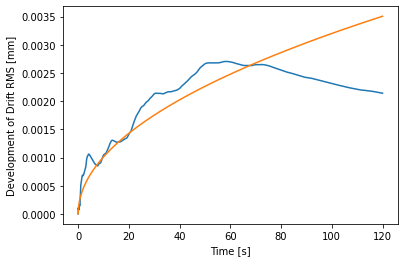

In [157]:
plt.plot(np.arange(0,t,1/fs), 
         np.sqrt(np.cumsum(displ_int**2)/np.arange(1,len(displ_int)+1))*1e3)
plt.plot(np.arange(0,t,1/fs), 
         np.sqrt(np.arange(1,len(displ_int)+1))*unc*0.32*np.sqrt(n_cha)*1e3) # 0.32 comes from 1 sigma
plt.ylabel('Development of Drift RMS [mm]')
plt.xlabel('Time [s]')

--> it looks like the drift increases with the squareroot of the time

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


Text(0.5, 0, 'Time [s]')

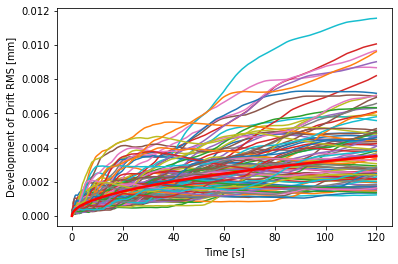

In [160]:
# run this a few times, so that it really approaches a square root
# random noise in your cable from measurement uncertainty
for i in range(100):
    print(i)
    dx_all = (np.random.rand(n_cha,int(fs*t))-0.5)*2*unc #starting position
    displ_int = np.cumsum(np.sum(dx_all, axis=0)) # displacement over the entire cable
    rms_func = np.sqrt(np.cumsum(displ_int**2)/np.arange(1,len(displ_int)+1))
    plt.plot(np.arange(0,t,1/fs), 
         rms_func*1e3)
plt.plot(np.arange(0,t,1/fs), 
         np.sqrt(np.arange(1,len(displ_int)+1))*unc*0.32*np.sqrt(n_cha)*1e3,
        color='r', linewidth=2.5) # 0.32 comes from 1 sigma
plt.ylabel('Development of Drift RMS [mm]')
plt.xlabel('Time [s]')

In [174]:
# drift of DAS as a function of time
t_max = 60*60*24*365
np.sqrt(fs*t_max)*unc*0.32*np.sqrt(n_cha)

0.0005151900620159516